<a href="https://colab.research.google.com/github/Msswamycreate/machine-learning-projects/blob/master/Assignemnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Assignment we will be working on Vehicle dataset from cardekho Dataset . This dataset contains information about used cars listed on www.cardekho.com. We are going to use for finding predictions of price with the use of Linear regression model.

The datasets consist of several independent variables include:

    Car_Name
    Year
    Selling_Price
    Present_Price
    Kms_Driven
    Fuel_Type
    Seller_Type
    Transmission
    Owner

We are going to use some of the variables which we need for regression models.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 1/Assignment

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 1/Assignment


Replce None with the proper code

In [ ]:
data=pd.read_csv("car data.csv") #Read  the CSV file as pandas dataframe  

In [ ]:
data.head() # check the head of the dataframe i.e., first few elements

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.describe() # Look how data is using .describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.columns #check the columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

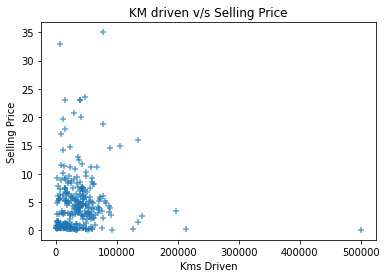

In [ ]:
# Create a Scatter plot to visulaize how Selling_Price varies with Kms_Driven
plt.scatter(data['Kms_Driven'],data['Selling_Price'],alpha=0.7,marker='+')
plt.title("KM driven v/s Selling Price")
plt.xlabel("Kms Driven")
plt.ylabel("Selling Price")
plt.show()

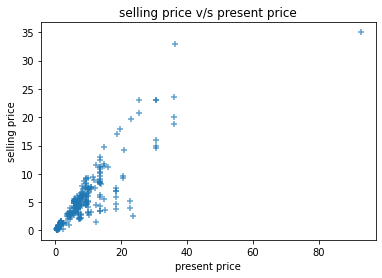

In [ ]:
# Create a Scatter plot to visulaize how Selling_Price varies with Present_Price
plt.scatter(data['Present_Price'],data['Selling_Price'],alpha=0.7,marker='+')
plt.title('selling price v/s present price')
plt.ylabel('selling price')
plt.xlabel('present price')
plt.show()

## Prepare the  dataset

In [ ]:
print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


since the values of these columns are words(/string). We have to convert them to numerical values inorder to feed them to the model

We are going to use LabelEncoder from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder
fuel_encoder=LabelEncoder() # Encoding fuel Column
data["Fuel_Type"]=fuel_encoder.fit_transform(data.Fuel_Type) #Fit label encoder and return encoded labels
#inverse_transform ->Transform labels back to original encoding. E.g, fuel_encoder.inverse_transform(data.Fuel_Type)

In [ ]:
data.head() # Fuel_Type column changed to numerical values

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [ ]:
seller_en=LabelEncoder()
data["Seller_Type"]= seller_en.fit_transform(data["Seller_Type"])

In [ ]:
trmn_en=LabelEncoder()
data["Transmission"]=trmn_en.fit_transform(data.Transmission)

In [ ]:
data.head() # Check if all the columns have numerical values (except car_name)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
y=data.Selling_Price # Select the selling price as y
x=data.drop(["Selling_Price","Car_Name"],axis=1) # Since name of the car does not seem to help in predicting


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


## Train the model


In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression(normalize=True)

In [ ]:
lr.fit(x_train,y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
predictions=lr.predict(x_test) #predictions on test examples
test_error=metrics.mean_absolute_error(y_test,predictions)
print("Mean absolute error on Test set: ",test_error)

predictions=lr.predict(x_train)
training_error=metrics.mean_absolute_error(y_train,predictions)#calculate mean absolute error based on y_train and predictions
print("Mean absolute error on Training set: ",training_error)

Mean absolute error on Test set:  1.1530045916159049
Mean absolute error on Training set:  1.2170411125157163


In [ ]:
data.iloc[0]

Car_Name          ritz
Year              2014
Selling_Price     3.35
Present_Price     5.59
Kms_Driven       27000
Fuel_Type            2
Seller_Type          0
Transmission         1
Owner                0
Name: 0, dtype: object

In [ ]:
x.tail(20)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
281,2006,7.60,50456,2,0,1,0
282,2014,14.00,63000,1,0,1,0
283,2016,11.80,9010,2,0,1,0
284,2013,5.90,9800,2,0,1,0
285,2016,8.50,15059,2,0,0,0
286,2016,7.90,28569,2,0,1,0
287,2015,7.50,44000,2,0,0,0
288,2015,13.60,34000,2,0,1,0
289,2016,13.60,10980,2,0,1,0
290,2014,6.40,19000,2,0,1,0


In [ ]:
Year            =  2014
Present_Price   =  5.59
Kms_Driven      = 27000
Fuel_Type       =     2
Seller_Type     =     0
Transmission    =     1
Owner           =     0

In [ ]:
my_car=np.array([Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner]) #Create numpy array of input

In [ ]:
print("predicted Value:",lr.predict(my_car.reshape(1,-1))) #Predicting the value

predicted Value: [3.84665454]
